In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from sklearn import model_selection
from sklearn import tree
import warnings

In [61]:
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Subject_Characteristics/Screening___Demographics.csv')
x[x['APPRDX']==1]

,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,SIGNCNST,CONSNTDT,APPRDX,CURRENT_APPRDX,P3GRP,...,PRJENRDT,REFERRAL,DECLINED,RSNDEC,EXCLUDED,RSNEXC,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,224392801,V,3400,CONSENT,SCREEN,1.0,06/2010,1.0,1.0,NaN,...,07/2010,60.0,NaN,NaN,NaN,NaN,06/2010,2010-12-17 10:58:57.0,NaN,07/2010
3,224400201,V,3403,CONSENT,SCREEN,1.0,06/2010,1.0,1.0,NaN,...,07/2010,1.0,NaN,NaN,NaN,NaN,06/2010,2010-07-20 08:35:45.0,NaN,07/2010
6,232689201,V,3406,CONSENT,SCREEN,1.0,07/2010,1.0,1.0,NaN,...,08/2010,1.0,NaN,NaN,NaN,NaN,07/2010,2010-07-22 12:32:00.0,NaN,07/2010
7,241547001,V,3407,CONSENT,SCREEN,1.0,08/2010,1.0,1.0,NaN,...,09/2010,1.0,NaN,NaN,NaN,NaN,08/2010,2010-08-31 13:04:55.0,NaN,08/2010
9,244478101,V,3150,CONSENT,SCREEN,1.0,09/2010,1.0,1.0,NaN,...,11/2010,99.0,NaN,NaN,NaN,NaN,09/2010,2010-09-15 15:21:11.0,NaN,11/2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,394430601,V,3333,CONSENT,SCREEN,1.0,04/2013,1.0,1.0,NaN,...,04/2013,1.0,NaN,NaN,NaN,NaN,04/2013,2013-04-19 11:51:04.0,NaN,04/2013
803,395408901,V,3288,CONSENT,SCREEN,1.0,02/2013,1.0,1.0,NaN,...,02/2013,53.0,NaN,NaN,NaN,NaN,04/2013,2013-04-26 08:46:50.0,NaN,05/2013
804,395481001,S,3289,CONSENT,SCREEN,1.0,03/2013,1.0,1.0,NaN,...,03/2013,50.0,NaN,NaN,1.0,1.0,04/2013,2020-02-11 12:17:17.0,NaN,05/2013
806,395596101,V,3290,CONSENT,SCREEN,1.0,02/2013,1.0,1.0,NaN,...,02/2013,72.0,NaN,NaN,NaN,NaN,04/2013,2013-04-26 15:07:56.0,NaN,05/2013


In [62]:
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Subject_Characteristics/PPMI_Baseline_Data_02Jul2018.csv')
PD_patlist=x[x['APPRDX']==1]['PATNO']

In [63]:
months=['BL','V04','V06','V08','V10']
files=[]
for period in months:
    
    y=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Motor_Assessments/MDS_UPDRS_Part_III.csv')
    y=y[y['PATNO'].isin(PD_patlist)]
    y=y[y['EVENT_ID']==period]
    y=y[(y['PAG_NAME']=='NUPDRS3')]
    
    y=y.iloc[:,np.r_[2,11:44]]
    y=y.sort_values(by=['PATNO']).reset_index()
    files.append(y.drop(columns='index'))


In [64]:
for df in files:
    df['Total_UPDRS3']=df.loc[:,'NP3SPCH':'NP3RTCON'].sum(axis=1,skipna=False)
    

In [65]:
prog=pd.DataFrame()
prog['PATNO']=files[0]['PATNO']
prog['BL_UPDRS3']=files[0]['Total_UPDRS3']


In [66]:
prog=prog.merge(files[1].loc[:,['PATNO','Total_UPDRS3']],how='left',on='PATNO')
prog=prog.rename(columns={'Total_UPDRS3':'year1_UPDRS3'})

prog=prog.merge(files[2].loc[:,['PATNO','Total_UPDRS3']],how='left',on='PATNO')
prog=prog.rename(columns={'Total_UPDRS3':'year2_UPDRS3'})

prog=prog.merge(files[3].loc[:,['PATNO','Total_UPDRS3']],how='left',on='PATNO')
prog=prog.rename(columns={'Total_UPDRS3':'year3_UPDRS3'})

prog=prog.merge(files[4].loc[:,['PATNO','Total_UPDRS3']],how='left',on='PATNO')
prog=prog.rename(columns={'Total_UPDRS3':'year4_UPDRS3'})


In [67]:
prog['Diff_BL_1yr']=prog['year1_UPDRS3']-prog['BL_UPDRS3']
prog['Diff_BL_2yr']=prog['year2_UPDRS3']-prog['BL_UPDRS3']
prog['Diff_BL_3yr']=prog['year3_UPDRS3']-prog['BL_UPDRS3']
prog['Diff_BL_4yr']=prog['year4_UPDRS3']-prog['BL_UPDRS3']


In [68]:
prog['Diff_BL_4yr'].dropna()

0      27.0
1      12.0
2      30.0
5      29.0
6      12.0
       ... 
411    14.0
413     9.0
414     9.0
417   -15.0
420    10.0
Name: Diff_BL_4yr, Length: 310, dtype: float64

20% are early progressor. Patients available:  58
80% are other patient. Patients available:  201


(array([ 0.,  0.,  0.,  0.,  2.,  8., 11., 30., 37., 58., 55., 43., 34.,
        16.,  7.,  5.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,  0.]),
 array([-40, -35, -30, -25, -20, -15, -10,  -5,   0,   5,  10,  15,  20,
         25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80]),
 <a list of 24 Patch objects>)

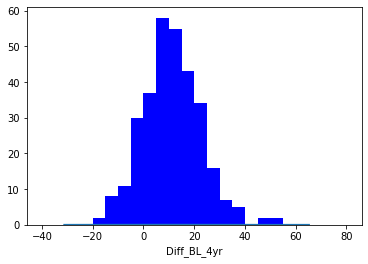

In [69]:
yr='4'
sns.distplot(prog['Diff_BL_'+yr+'yr'],kde_kws={'shade':True,'linewidth':2})
plt.savefig('Diff_BL_'+yr+'yr')


x=prog.loc[:,['PATNO','Diff_BL_'+yr+'yr']].dropna().sort_values(by=['Diff_BL_'+yr+'yr'],ascending=False)
group_early=x[x['Diff_BL_'+yr+'yr']>20]['PATNO']
group_others=x[x['Diff_BL_'+yr+'yr']<15]['PATNO']
print('20% are early progressor. Patients available: ',len(group_early))
print('80% are other patient. Patients available: ',len(group_others))

plt.hist(prog['Diff_BL_'+yr+'yr'],bins=np.arange(-40,81,5),color='b')


In [10]:
BL_Feat=pd.DataFrame()
BL_Feat['PATNO']=PD_patlist

## family history, socio-economics, demographics
### for these files i have kept only: gender, handedness, dominant side, age on set, age, age on diag, education years. should i keep also information about the family history?

## Vital signs
### For this file there are information about blood pression (systolic and  diastolic), weight, height, temperature  at Screening. Maybe only height and weight should be take into account...

In [11]:
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Medical_History/Vital_Signs.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='BL']
x=x.iloc[:,np.r_[2,6:9,10:16]]
x['BMI']=x['WGTKG']/((x['HTCM']/100)*(x['HTCM']/100))
BL_Feat=BL_Feat.merge(x.loc[:,['PATNO','BMI','SYSSUP','HRSUP']],on='PATNO',how='left')

In [12]:
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Subject_Characteristics/PPMI_Baseline_Data_02Jul2018.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='BL']
x=x.iloc[:,np.r_[1,4,6,7,14,15,16]]
BL_Feat=BL_Feat.merge(x,on='PATNO',how='left')
BL_Feat

,PATNO,BMI,SYSSUP,HRSUP,age,gen,EDUCYRS,ageonset,agediag,DOMSIDE
0,3001,22.156529,146.0,63.0,65.1425,1,16,63.5918,64.2603,2
1,3002,28.280724,136.0,64.0,67.5781,2,16,65.5205,66.5041,1
2,3003,27.717685,110.0,60.0,56.7178,2,16,51.8274,54.6685,2
3,3006,25.076208,106.0,68.0,57.5397,2,14,56.1397,57.0986,2
4,3007,25.312461,148.0,72.0,64.5479,1,16,63.8575,64.1671,2
...,...,...,...,...,...,...,...,...,...,...
418,4124,29.608376,NaN,NaN,71.1178,1,14,68.2137,70.7919,2
419,4125,31.526662,117.0,66.0,64.0192,1,21,62.9828,63.811,1
420,4126,40.755947,120.0,66.0,55.7342,1,12,55.0369,55.5068,2
421,4135,35.267314,137.0,80.0,66.8329,1,14,64.6712,65.6329,2


# Motor Symptoms
## MDS-UPDRS I
### aggregate scores: Cognitive, sleep, Autonomic nervous system and total updrs 1

In [13]:
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Motor_Assessments/MDS_UPDRS_Part_I.csv')
y=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Motor_Assessments/MDS_UPDRS_Part_I__Patient_Questionnaire.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='BL']

y=y[y['PATNO'].isin(PD_patlist)]
y=y[y['EVENT_ID']=='BL']
x=x.iloc[:,np.r_[2,7:13]]
y=y.iloc[:,np.r_[2,7:14]]
x=x.merge(y,how='outer',on='PATNO')
x['Cognitive']=x.loc[:,['NP1COG','NP1HALL','NP1DPRS','NP1ANXS','NP1APAT','NP1DDS']].sum(axis=1,skipna=False)
x['Sleep']=x.loc[:,['NP1SLPN','NP1SLPD']].sum(axis=1,skipna=False)
x['Autonomic_Nervous_System']=x.loc[:,['NP1URIN','NP1CNST','NP1LTHD','NP1FATG']].sum(axis=1,skipna=False)
x['Total_UPDRS1']=x.loc[:,'NP1COG':'NP1FATG'].sum(axis=1,skipna=False)

BL_Feat=BL_Feat.merge(x.iloc[:,np.r_[0,14:18]],on='PATNO',how='left')




## MDS-UPDRS II
### aggregate scores: Bulbar, common daily activity, bed, gait and total updrs 2

In [14]:
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Motor_Assessments/MDS_UPDRS_Part_II__Patient_Questionnaire.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='BL']
x['Bulbar']=x.loc[:,['NP2SPCH','NP2SALV','NP2SWAL','NP2EAT']].sum(axis=1,skipna=False)
x['Common_daily_act']= x.loc[:,['NP2DRES','NP2HYGN','NP2HWRT','NP2HOBB']].sum(axis=1,skipna=False)
x['Bed']=x.loc[:,['NP2TURN','NP2RISE']].sum(axis=1,skipna=False)
x['Gait']=x.loc[:,['NP2WALK','NP2FREZ']].sum(axis=1,skipna=False)
x['Total_UPDRS2']=x.loc[:,'NP2SPCH':'NP2FREZ'].sum(axis=1,skipna=False)
x=x.loc[:,['PATNO','Bulbar','Common_daily_act','Bed','Gait','Total_UPDRS2']]
BL_Feat=BL_Feat.merge(x,on='PATNO',how='left')


## MDS-UPDRS III
### aggregate scores: Axial subscore 1, axial subscore 2, limb rigidity, limb bradykinesia, tremor, rest tremor, appendicular, left motor score, right motor score, asymmetry, total updrs 3 and total updrs

In [15]:
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Motor_Assessments/MDS_UPDRS_Part_III.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='BL']
x=x.iloc[:,np.r_[2,11:44]]
x['Axial_Sub_1']=x.loc[:,['NP3SPCH','NP3FACXP','NP3RIGN',
                     'NP3RISNG','NP3GAIT','NP3FRZGT',
                     'NP3PSTBL','NP3POSTR','NP3BRADY','NP3RTALJ']].sum(axis=1,skipna=False)
x['Axial_Sub_2']=x.loc[:,['NP3RISNG','NP3GAIT','NP3FRZGT',
                     'NP3PSTBL','NP3POSTR','NP3BRADY']].sum(axis=1,skipna=False)
x['Limb_Rig_Sub']=x.loc[:,['NP3RIGRU','NP3RIGLU','PN3RIGRL','NP3RIGLL']].sum(axis=1,skipna=False)
x['Limb_Brady_Sub']=x.loc[:,['NP3FTAPR','NP3FTAPL','NP3HMOVR','NP3HMOVL',
                             'NP3PRSPR','NP3PRSPL','NP3TTAPR','NP3TTAPL',
                            'NP3LGAGR','NP3LGAGL']].sum(axis=1,skipna=False)
x['Tremor_Sub']=x.loc[:,['NP3PTRMR','NP3PTRML','NP3KTRMR','NP3KTRML','NP3RTARU',
                          'NP3RTALU','NP3RTARL','NP3RTALL','NP3RTCON']].sum(axis=1,skipna=False)
x['Rest_Tremor_Sub']=x.loc[:,['NP3RTARU','NP3RTALU','NP3RTARL','NP3RTALL','NP3RTCON']].sum(axis=1,skipna=False)
x['Append_Sub']=x.loc[:,['Limb_Rig_Sub','Limb_Brady_Sub','Tremor_Sub']].sum(axis=1,skipna=False)
x['Left_Motor_Score']=x.loc[:,['NP3RIGLU','NP3RIGLL','NP3FTAPL','NP3HMOVL',
                                 'NP3PRSPL','NP3TTAPL','NP3LGAGL','NP3PTRML',
                                 'NP3KTRML','NP3RTALU','NP3RTALL']].sum(axis=1,skipna=False)
x['Right_Motor_Score']=x.loc[:,['NP3RIGRU','PN3RIGRL','NP3FTAPR','NP3HMOVR',
                                  'NP3PRSPR','NP3TTAPR','NP3LGAGR','NP3PTRMR',
                                  'NP3KTRMR','NP3RTARU','NP3RTARL']].sum(axis=1,skipna=False)
x['Diff']=x['Left_Motor_Score']-x['Right_Motor_Score']
x['Asymmetry']=np.abs(x['Diff'])

x['Total_UPDRS3']=x.loc[:,'NP3SPCH':'NP3RTCON'].sum(axis=1,skipna=False)

x=x.loc[:,['PATNO','Axial_Sub_1','Axial_Sub_2','Limb_Rig_Sub','Limb_Brady_Sub','Tremor_Sub','Rest_Tremor_Sub',
          'Append_Sub','Left_Motor_Score','Right_Motor_Score','Diff','Asymmetry','Total_UPDRS3']]

BL_Feat=BL_Feat.merge(x,on='PATNO',how='left')
BL_Feat['Total_UPDRS']=BL_Feat['Total_UPDRS1']+BL_Feat['Total_UPDRS2']+BL_Feat['Total_UPDRS3']


## Modified Schwab and England ADL
### in the file is present the final total score, i have used it.

In [16]:
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Motor_Assessments/Modified_Schwab_+_England_ADL.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='BL']
x=x.loc[:,['PATNO','MSEADLG']]
BL_Feat=BL_Feat.merge(x,on='PATNO',how='left')


## PASE Household activity
### there are NOT data at Screening nor ant baseline. They shouldn't have put it in the paper. Maybe the doctors have said to the engineer to keep this file in to account without look if there were data available.

In [17]:
#NO DATA AT BL OR SCREENING
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Motor_Assessments/PASE_-_Household_Activity.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='BL']
x

,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,LTHSWRK,HVYHSWRK,HMREPR,LAWNWRK,OUTGARDN,CAREGVR,WRKVL,WRKVLHR,WRKVLACT,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
535,399546101,V,3134,BL,PASE,2,2,1,2,1.0,2.0,2.0,50.0,3.0,05/2013,2013-05-29 14:30:56.0,NaN,2013-05-29 14:31:05.0


# Non- Motor Symptoms
## Benton Judgment of line orientation
### in the file there is the derived total score for this examination. Derived total score per age and derived total score per agen and education

In [18]:
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Non-Motor-Asses/Neurophysiological/Benton_Judgment_of_Line_Orientation.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='BL']
x=x.loc[:,['PATNO','DVS_JLO_MSSAE']]
BL_Feat=BL_Feat.merge(x,on='PATNO',how='left')

## Cognitive categorization
### at BL there are data for 106 patients instead of 423, 75% of data missing. useless file.

In [19]:
#106 on 423 = 75% of data missing on cognitive categorization
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Non-Motor-Asses/Cognition/Cognitive_Categorization.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='BL']
x

,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,PTCGBOTH,COGDECLN,FNCDTCOG,COGSTATE,COGDXCL,RVWNPSY,COGCAT,COGCAT_TEXT,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,355330201,V,3179,BL,COGCATG,07/2012,3,0.0,0.0,1.0,1.0,1.0,1.0,Normal,07/2012,2012-07-23 17:22:03.0,NaN,07/2012
8,377550801,V,3832,BL,COGCATG,12/2012,1,0.0,0.0,1.0,1.0,0.0,1.0,Normal,12/2012,2012-12-12 06:01:42.0,NaN,12/2012
9,377944301,V,4102,BL,COGCATG,12/2012,1,0.0,0.0,1.0,1.0,0.0,1.0,Normal,12/2012,2012-12-14 05:36:58.0,NaN,12/2012
11,380570801,V,3542,BL,COGCATG,01/2013,1,0.0,0.0,1.0,1.0,0.0,1.0,Normal,01/2013,2013-01-07 12:42:23.0,NaN,01/2013
12,381903801,V,4106,BL,COGCATG,01/2013,1,0.0,0.0,1.0,1.0,1.0,1.0,Normal,01/2013,2013-01-16 11:22:05.0,NaN,01/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4896,399712801,S,4083,BL,COGCATG,01/2013,1,0.0,0.0,1.0,1.0,1.0,1.0,Normal,05/2013,2020-02-19 08:29:39.0,NaN,05/2013
4921,417066401,V,4125,BL,COGCATG,04/2013,1,0.0,0.0,1.0,1.0,0.0,1.0,Normal,11/2013,2013-11-07 10:42:57.0,NaN,11/2013
4963,433621101,V,3290,BL,COGCATG,05/2013,1,0.0,0.0,1.0,1.0,1.0,5.0,Indeterminate,04/2014,2014-04-03 08:17:51.0,NaN,04/2014
4966,433677601,V,4124,BL,COGCATG,04/2013,1,0.0,0.0,2.0,2.0,1.0,1.0,Normal,04/2014,2014-04-08 12:27:10.0,NaN,04/2014


## Epworth Sleepiness Scale
### In the original paper they suggest to made the sum of the 8 questions. I have used the sum.

In [20]:
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Non-Motor-Asses/Sleep_Disorder/Epworth_Sleepiness_Scale.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='BL']
x['Epworth_SUM']=x.loc[:,'ESS1':'ESS8'].sum(axis=1,skipna=False)
x=x.loc[:,['PATNO','Epworth_SUM']]
BL_Feat=BL_Feat.merge(x,on='PATNO',how='left')


## Geriatric depression scale short
### In the original paper they suggest the sum of the question outcome. I have used it.

In [21]:
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Non-Motor-Asses/NeuroBehavioral/Geriatric_Depression_Scale__Short_.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='BL']
x=x.iloc[:,np.r_[2,6:21,]]
no=['GDSSATIS', 'GDSGSPIR', 'GDSHAPPY', 'GDSALIVE', 'GDSENRGY']
x['GDS_SUM']=np.zeros(len(x))
for i in no:
    x[i]=1-x[i]
x['GDS_SUM']=x.loc[:,'GDSSATIS':'GDSBETER'].sum(axis=1,skipna=False)
x=x.loc[:,['PATNO','GDS_SUM']]
BL_Feat=BL_Feat.merge(x,on='PATNO',how='left')


## Hopkins verbal learning test
### For this file there isn't an explicit way to compute an overall score, anyway in the file there are these features.
### Derived-Total Recall T-Score, Derived-Delayed Recall T-Score, Derived-Retention T-Score, Derived-Recog. Discrim. Index T-Score

In [22]:
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Non-Motor-Asses/Neurophysiological/Hopkins_Verbal_Learning_Test.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='BL']
x=x.iloc[:,np.r_[2,16]]
BL_Feat=BL_Feat.merge(x,on='PATNO',how='left')
BL_Feat

,PATNO,BMI,SYSSUP,HRSUP,age,gen,EDUCYRS,ageonset,agediag,DOMSIDE,...,Right_Motor_Score,Diff,Asymmetry,Total_UPDRS3,Total_UPDRS,MSEADLG,DVS_JLO_MSSAE,Epworth_SUM,GDS_SUM,DVT_TOTAL_RECALL
0,3001,22.156529,146.0,63.0,65.1425,1,16,63.5918,64.2603,2,...,8.0,-8.0,8.0,12.0,22.0,95,15.46,6.0,1.0,51.0
1,3002,28.280724,136.0,64.0,67.5781,2,16,65.5205,66.5041,1,...,3.0,6.0,6.0,17.0,40.0,80,12.16,14.0,3.0,53.0
2,3003,27.717685,110.0,60.0,56.7178,2,16,51.8274,54.6685,2,...,15.0,-11.0,11.0,29.0,47.0,85,12.16,8.0,1.0,54.0
3,3006,25.076208,106.0,68.0,57.5397,2,14,56.1397,57.0986,2,...,8.0,0.0,0.0,22.0,29.0,95,7.12,0.0,0.0,41.0
4,3007,25.312461,148.0,72.0,64.5479,1,16,63.8575,64.1671,2,...,9.0,-2.0,2.0,21.0,35.0,95,6.66,16.0,0.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,4124,29.608376,NaN,NaN,71.1178,1,14,68.2137,70.7919,2,...,19.0,-11.0,11.0,40.0,54.0,90,8.22,8.0,3.0,48.0
419,4125,31.526662,117.0,66.0,64.0192,1,21,62.9828,63.811,1,...,12.0,7.0,7.0,40.0,44.0,90,12.11,4.0,0.0,35.0
420,4126,40.755947,120.0,66.0,55.7342,1,12,55.0369,55.5068,2,...,13.0,-6.0,6.0,30.0,39.0,90,16.38,3.0,4.0,41.0
421,4135,35.267314,137.0,80.0,66.8329,1,14,64.6712,65.6329,2,...,6.0,-6.0,6.0,15.0,42.0,90,13.72,5.0,6.0,20.0


## Letter number sequencing PD
### In the file there is the total score, i have used it.

In [23]:
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Non-Motor-Asses/Neurophysiological/Letter_-_Number_Sequencing__PD_.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='BL']
x=x.loc[:,['PATNO','DVS_LNS']]
BL_Feat=BL_Feat.merge(x,on='PATNO',how='left')

## Montreal cognitive assessment
### I have used the MoCA total score

In [24]:
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Non-Motor-Asses/Neurophysiological/Montreal_Cognitive_Assessment__MoCA_.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='SC']
x=x.loc[:,['PATNO','MCATOT']]
BL_Feat=BL_Feat.merge(x,on='PATNO',how='left')

## Questionnaire for impulsive compulsive disorders
### each question could have an answer that could be yes or no (1 or 0). 
### I made the sum of the all question. The idea is bigger sum more probability to have an impulsive compulsive disorder.

In [25]:
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Non-Motor-Asses/NeuroBehavioral/QUIP_Current_Short.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='BL']
x=x.iloc[:,np.r_[2,7:20]]
x['QUIP_Sum']=x.loc[:,'TMGAMBLE':'CNTRLDSM'].sum(axis=1,skipna=False)
x['QUIP_Buying']=x.loc[:,['TMBUY','CNTRLBUY']].sum(axis=1,skipna=False)
x['QUIP_Eating']=x.loc[:,['TMEAT','CNTRLEAT']].sum(axis=1,skipna=False)
x['QUIP_Gamble']=x.loc[:,['TMGAMBLE','CNTRLGMB']].sum(axis=1,skipna=False)
x['QUIP_Hobbies']=x.loc[:,['TMTORACT']].sum(axis=1,skipna=False)
x['QUIP_Punding']=x.loc[:,['TMTMTACT']].sum(axis=1,skipna=False)
x['QUIP_Sex']=x.loc[:,['TMSEX','CNTRLSEX']].sum(axis=1,skipna=False)
x['QUIP_Driving']=x.loc[:,['TMTRWD']].sum(axis=1,skipna=False)
                          
x=x.loc[:,['PATNO','QUIP_Sum']]
BL_Feat=BL_Feat.merge(x,on='PATNO',how='left')


## REM Sleep disorder questionnaire
### same idea of QUIP

In [26]:
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Non-Motor-Asses/Sleep_Disorder/REM_Sleep_Disorder_Questionnaire.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='BL']
x=x.iloc[:,np.r_[2,7:28]]
x['REM_Sum']=x.loc[:,'DRMVIVID':'CNSOTH'].sum(axis=1,skipna=False)
x=x.loc[:,['PATNO','REM_Sum']]
BL_Feat=BL_Feat.merge(x,on='PATNO',how='left')


## SCOPA-AUT: Scale for outcomes in PD for autonomic symptoms
### Each variable could assume a value from 0 to 3 (never, sometimes, regularly, often). i have computed the overall score: 1-21 if there is a 9-> add 3 otherwise use the normal score, 22-25 if there is a 9-> add 0 otherwise use the normal score.

In [27]:
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Non-Motor-Asses/Autonomic/SCOPA-AUT.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='BL']
for i in x.loc[:,'SCAU1':'SCAU21'].columns:
    x[i]=x[i].replace(9,3)
for i in x.loc[:,'SCAU22':'SCAU25'].columns: 
    x[i]=x[i].replace(9,0)
x['SCOPA_TOT']=x.loc[:,'SCAU1':'SCAU25'].sum(axis=1)
x['SCOPA_Gastro']=x.loc[:,'SCAU1':'SCAU7'].sum(axis=1)
x['SCOPA_Urinary']=x.loc[:,'SCAU8':'SCAU13'].sum(axis=1)
x['SCOPA_Cardio']=x.loc[:,'SCAU14':'SCAU16'].sum(axis=1)
x['SCOPA_Pupillomotor']=x.loc[:,'SCAU19']
x['SCOPA_Thermoreg']=x.loc[:,['SCAU17','SCAU18','SCAU20','SCAU21']].sum(axis=1)
x['SCOPA_Sex']=x.loc[:,'SCAU22':'SCAU25'].sum(axis=1)
x=x.loc[:,['PATNO','SCOPA_TOT']]
BL_Feat=BL_Feat.merge(x,on='PATNO',how='left')

## Lexical fluency
### No data at baseline nor at screening

In [28]:
#SIETE FAKE NON CI SONO i DATI ALLA BASELINE
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Non-Motor-Asses/Neurophysiological/Lexical_Fluency.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='SC']
x

,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,LXFLUEF,LXFLUEA,LXFLUES,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV


## STAI, Stait trait anxiety inventory
### in the original paper they used the overall score and 2 aggregate score. I have computed them.

In [29]:
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Non-Motor-Asses/NeuroBehavioral/State-Trait_Anxiety_Inventory.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='BL']
x=x.iloc[:,np.r_[2,6:46]]
rev=[1, 2, 5, 8, 10, 11, 15, 16, 19, 20, 21, 23, 26, 27, 30, 33, 34, 36, 39]
for (j,i) in zip(x.iloc[:,1:].columns,range(1,41)):
    if i in rev:
        x[j]=5-x[j]
x['STAI_Sum_S']=x.loc[:,'STAIAD1':'STAIAD20'].sum(axis=1,skipna=False)
x['STAI_Sum_T']=x.loc[:,'STAIAD21':'STAIAD40'].sum(axis=1,skipna=False)
x['STAI_Sum']=x['STAI_Sum_S']+x['STAI_Sum_T']
x=x.loc[:,['PATNO','STAI_Sum']]
BL_Feat=BL_Feat.merge(x,on='PATNO',how='left')


## Symbol digit Modalities
### There is an overall score in the file, i have used it.

In [30]:
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Non-Motor-Asses/Neurophysiological/Symbol_Digit_Modalities.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='BL']
x=x.loc[:,['PATNO','DVT_SDM']]
BL_Feat=BL_Feat.merge(x,on='PATNO',how='left')


## University of Pennysylvania smell id test
### in the file to categorize a patient they used the sum of 4 variables. i have taken into account only the sum of these variables.

In [31]:
x=pd.read_csv('Desktop/Thesis/PPMI_Dataset/Non-Motor-Asses/Olfactory/University_of_Pennsylvania_Smell_ID_Test.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']=='BL']
x=x.loc[:,['PATNO','UPSITBK1','UPSITBK2','UPSITBK3','UPSITBK4']]
x['UPSIT_Sum']=x.loc[:,'UPSITBK1':'UPSITBK4'].sum(axis=1,skipna=False)
x=x.loc[:,['PATNO','UPSIT_Sum']]
BL_Feat=BL_Feat.merge(x,on='PATNO',how='left')


In [32]:
var=['ageonset','agediag','DOMSIDE']
for i in var:
    BL_Feat[i]=BL_Feat[i].astype('float64')
print(BL_Feat.columns)
BL_Feat.info()

Index(['PATNO', 'BMI', 'SYSSUP', 'HRSUP', 'age', 'gen', 'EDUCYRS', 'ageonset',
       'agediag', 'DOMSIDE', 'Cognitive', 'Sleep', 'Autonomic_Nervous_System',
       'Total_UPDRS1', 'Bulbar', 'Common_daily_act', 'Bed', 'Gait',
       'Total_UPDRS2', 'Axial_Sub_1', 'Axial_Sub_2', 'Limb_Rig_Sub',
       'Limb_Brady_Sub', 'Tremor_Sub', 'Rest_Tremor_Sub', 'Append_Sub',
       'Left_Motor_Score', 'Right_Motor_Score', 'Diff', 'Asymmetry',
       'Total_UPDRS3', 'Total_UPDRS', 'MSEADLG', 'DVS_JLO_MSSAE',
       'Epworth_SUM', 'GDS_SUM', 'DVT_TOTAL_RECALL', 'DVS_LNS', 'MCATOT',
       'QUIP_Sum', 'REM_Sum', 'SCOPA_TOT', 'STAI_Sum', 'DVT_SDM', 'UPSIT_Sum'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 422
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PATNO                     423 non-null    int64  
 1   BMI                       422 non-null    float

In [33]:
BL_Feat=BL_Feat.merge(prog.loc[:,['PATNO','Diff_BL_4yr']].dropna(),how='left',on='PATNO')

In [34]:
BL_Feat=BL_Feat[np.isnan(BL_Feat['Diff_BL_4yr'])==False]
BL_Feat

,PATNO,BMI,SYSSUP,HRSUP,age,gen,EDUCYRS,ageonset,agediag,DOMSIDE,...,DVT_TOTAL_RECALL,DVS_LNS,MCATOT,QUIP_Sum,REM_Sum,SCOPA_TOT,STAI_Sum,DVT_SDM,UPSIT_Sum,Diff_BL_4yr
0,3001,22.156529,146.0,63.0,65.1425,1,16,63.5918,64.2603,2.0,...,51.0,17.0,29.0,1.0,4.0,12.0,51.0,48.330002,25.0,27.0
1,3002,28.280724,136.0,64.0,67.5781,2,16,65.5205,66.5041,1.0,...,53.0,13.0,29.0,1.0,8.0,22.0,69.0,47.500000,17.0,12.0
2,3003,27.717685,110.0,60.0,56.7178,2,16,51.8274,54.6685,2.0,...,54.0,13.0,25.0,0.0,3.0,16.0,51.0,37.500000,23.0,30.0
5,3010,28.650756,140.0,52.0,46.9657,1,16,45.9657,46.6068,1.0,...,42.0,14.0,26.0,0.0,10.0,9.0,72.0,52.000000,9.0,29.0
6,3012,24.598765,100.0,77.0,58.8192,1,16,55.5462,58.5342,2.0,...,41.0,11.0,27.0,0.0,9.0,14.0,71.0,46.000000,15.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,4113,22.892820,120.0,70.0,33.7178,2,14,30.9918,31.8384,1.0,...,48.0,7.0,24.0,0.0,2.0,8.0,54.0,40.000000,30.0,14.0
413,4115,26.989619,140.0,75.0,66.5753,1,16,64.5589,66.4000,2.0,...,51.0,13.0,28.0,2.0,9.0,11.0,48.0,53.000000,27.0,9.0
414,4117,30.986310,133.0,70.0,59.9315,2,13,58.5699,59.7014,2.0,...,39.0,8.0,25.0,2.0,6.0,10.0,70.0,56.250000,30.0,9.0
417,4123,31.462585,138.0,71.0,60.2737,2,16,59.5383,59.9235,2.0,...,27.0,13.0,25.0,0.0,4.0,2.0,61.0,47.000000,29.0,-15.0


In [35]:
BL_Feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 420
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PATNO                     310 non-null    int64  
 1   BMI                       310 non-null    float64
 2   SYSSUP                    310 non-null    float64
 3   HRSUP                     310 non-null    float64
 4   age                       310 non-null    float64
 5   gen                       310 non-null    int64  
 6   EDUCYRS                   310 non-null    int64  
 7   ageonset                  310 non-null    float64
 8   agediag                   310 non-null    float64
 9   DOMSIDE                   310 non-null    float64
 10  Cognitive                 310 non-null    float64
 11  Sleep                     310 non-null    float64
 12  Autonomic_Nervous_System  310 non-null    float64
 13  Total_UPDRS1              310 non-null    float64
 14  Bulbar    

In [36]:
BL_Feat=BL_Feat.drop(columns=['Diff','Left_Motor_Score','Right_Motor_Score','Asymmetry',
                              'Total_UPDRS1','Total_UPDRS2','Total_UPDRS3','Total_UPDRS'])


In [37]:
BL_Feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 420
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PATNO                     310 non-null    int64  
 1   BMI                       310 non-null    float64
 2   SYSSUP                    310 non-null    float64
 3   HRSUP                     310 non-null    float64
 4   age                       310 non-null    float64
 5   gen                       310 non-null    int64  
 6   EDUCYRS                   310 non-null    int64  
 7   ageonset                  310 non-null    float64
 8   agediag                   310 non-null    float64
 9   DOMSIDE                   310 non-null    float64
 10  Cognitive                 310 non-null    float64
 11  Sleep                     310 non-null    float64
 12  Autonomic_Nervous_System  310 non-null    float64
 13  Bulbar                    310 non-null    float64
 14  Common_dai

In [38]:
early=BL_Feat[BL_Feat['PATNO'].isin(group_early)].copy()
others=BL_Feat[BL_Feat['PATNO'].isin(group_others)].copy()
early['Class']=1
others['Class']=0
whole=pd.concat([early,others])
whole=whole.sort_values(by=['PATNO']).reset_index().drop(columns=['index','Diff_BL_4yr'])
whole
#whole.to_csv('BL_features_1.csv')

,PATNO,BMI,SYSSUP,HRSUP,age,gen,EDUCYRS,ageonset,agediag,DOMSIDE,...,DVT_TOTAL_RECALL,DVS_LNS,MCATOT,QUIP_Sum,REM_Sum,SCOPA_TOT,STAI_Sum,DVT_SDM,UPSIT_Sum,Class
0,3001,22.156529,146.0,63.0,65.1425,1,16,63.5918,64.2603,2.0,...,51.0,17.0,29.0,1.0,4.0,12.0,51.0,48.330002,25.0,1
1,3002,28.280724,136.0,64.0,67.5781,2,16,65.5205,66.5041,1.0,...,53.0,13.0,29.0,1.0,8.0,22.0,69.0,47.500000,17.0,0
2,3003,27.717685,110.0,60.0,56.7178,2,16,51.8274,54.6685,2.0,...,54.0,13.0,25.0,0.0,3.0,16.0,51.0,37.500000,23.0,1
3,3010,28.650756,140.0,52.0,46.9657,1,16,45.9657,46.6068,1.0,...,42.0,14.0,26.0,0.0,10.0,9.0,72.0,52.000000,9.0,1
4,3012,24.598765,100.0,77.0,58.8192,1,16,55.5462,58.5342,2.0,...,41.0,11.0,27.0,0.0,9.0,14.0,71.0,46.000000,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,4113,22.892820,120.0,70.0,33.7178,2,14,30.9918,31.8384,1.0,...,48.0,7.0,24.0,0.0,2.0,8.0,54.0,40.000000,30.0,0
255,4115,26.989619,140.0,75.0,66.5753,1,16,64.5589,66.4000,2.0,...,51.0,13.0,28.0,2.0,9.0,11.0,48.0,53.000000,27.0,0
256,4117,30.986310,133.0,70.0,59.9315,2,13,58.5699,59.7014,2.0,...,39.0,8.0,25.0,2.0,6.0,10.0,70.0,56.250000,30.0,0
257,4123,31.462585,138.0,71.0,60.2737,2,16,59.5383,59.9235,2.0,...,27.0,13.0,25.0,0.0,4.0,2.0,61.0,47.000000,29.0,0


In [38]:
whole.describe()

,PATNO,BMI,SYSSUP,HRSUP,age,gen,EDUCYRS,ageonset,agediag,DOMSIDE,...,DVT_TOTAL_RECALL,DVS_LNS,MCATOT,QUIP_Sum,REM_Sum,SCOPA_TOT,STAI_Sum,DVT_SDM,UPSIT_Sum,Class
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,...,258.000000,258.000000,259.000000,257.000000,259.000000,259.000000,258.000000,258.000000,259.000000,259.000000
mean,3529.015444,27.114281,129.972973,67.683398,61.037428,1.351351,15.486486,59.134124,60.484958,1.567568,...,46.058140,11.500000,27.150579,0.342412,4.459459,9.637066,65.492248,45.762248,21.918919,0.223938
std,329.537496,4.646154,16.649931,10.905521,9.693206,0.478317,2.891248,9.793638,9.660843,0.541200,...,10.882487,2.629154,2.219651,0.865727,2.777487,6.344712,18.063925,9.559953,8.298991,0.417688
min,3001.000000,17.715420,82.000000,44.000000,33.497700,1.000000,5.000000,29.208100,31.838400,1.000000,...,20.000000,4.000000,17.000000,0.000000,0.000000,0.000000,40.000000,20.000000,1.000000,0.000000
25%,3226.500000,24.084377,120.000000,60.000000,54.627250,1.000000,14.000000,52.932950,54.279500,1.000000,...,39.000000,10.000000,26.000000,0.000000,2.000000,5.000000,51.000000,40.830002,15.000000,0.000000
50%,3504.000000,26.674874,130.000000,66.000000,61.841100,1.000000,16.000000,59.939700,61.367100,2.000000,...,46.000000,12.000000,28.000000,0.000000,4.000000,8.000000,63.000000,46.834999,22.000000,0.000000
75%,3788.000000,29.591770,140.000000,75.000000,67.905600,2.000000,18.000000,66.282200,67.327400,2.000000,...,54.000000,13.000000,29.000000,0.000000,6.000000,13.000000,76.000000,51.000000,28.000000,0.000000
max,4126.000000,43.761154,212.000000,103.000000,82.975800,2.000000,24.000000,81.475200,81.792200,3.000000,...,73.000000,18.000000,30.000000,8.000000,13.000000,33.000000,115.000000,80.000000,39.000000,1.000000


# Outliers
## No medical reason to exclude few of them

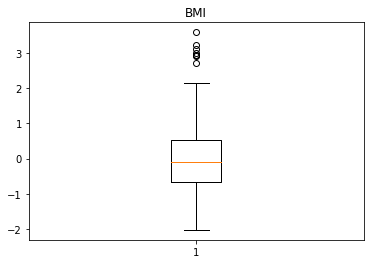

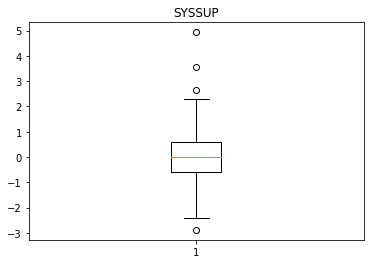

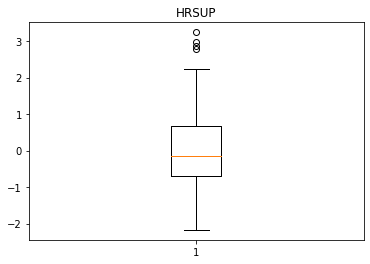

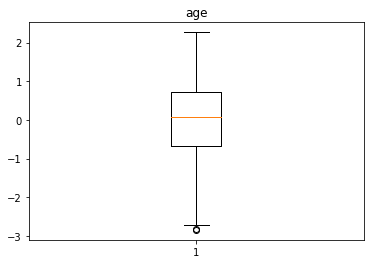

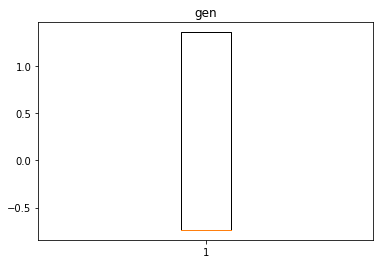

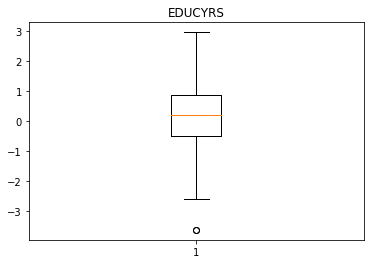

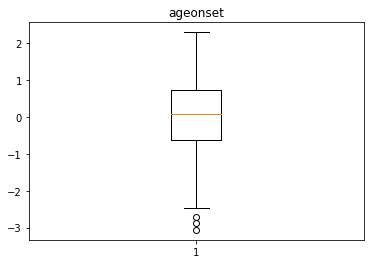

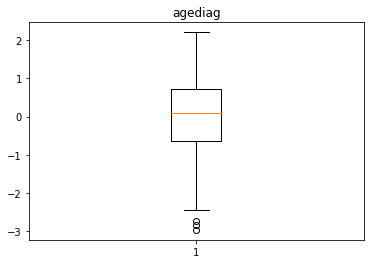

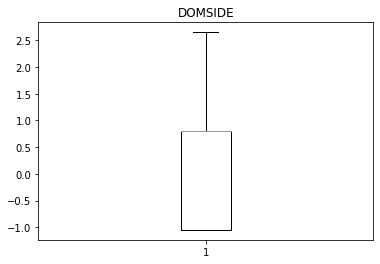

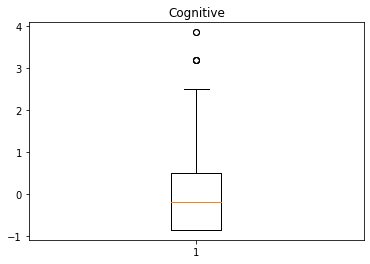

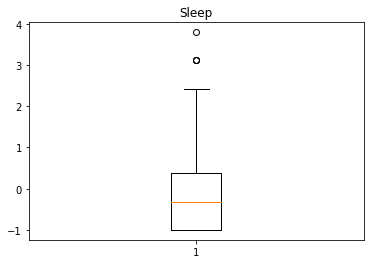

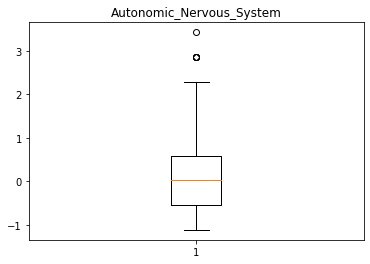

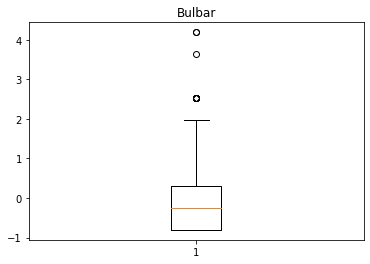

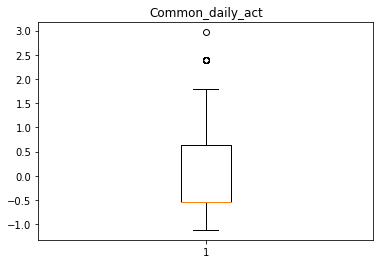

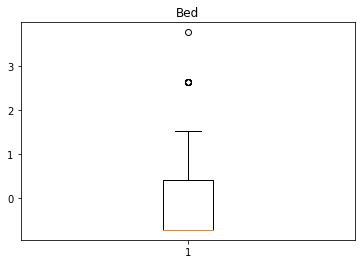

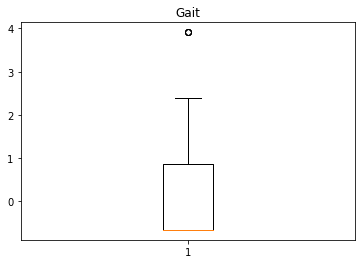

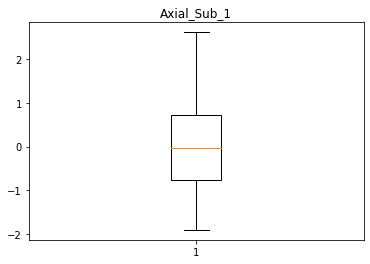

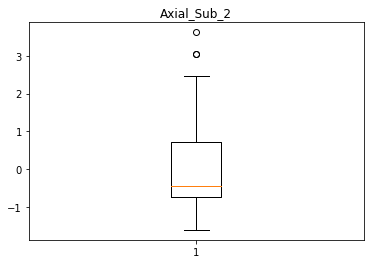

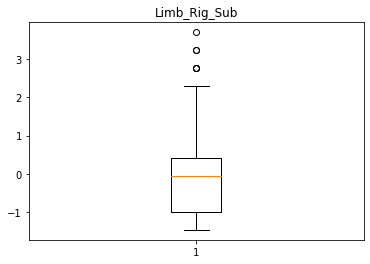

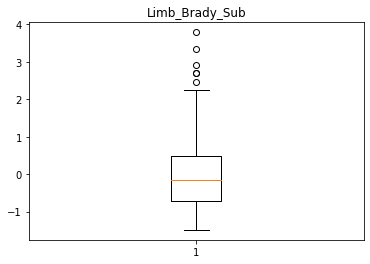

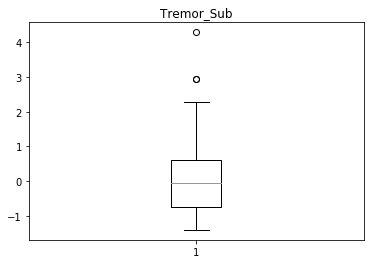

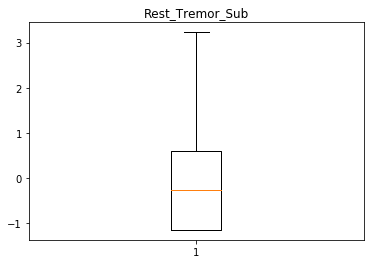

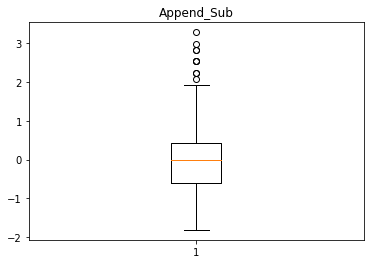

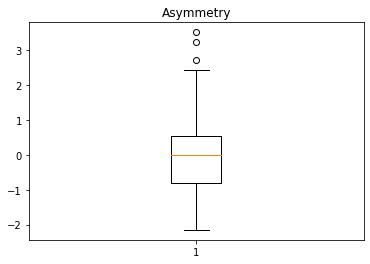

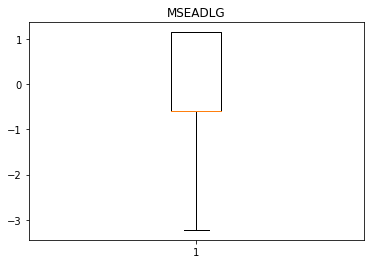

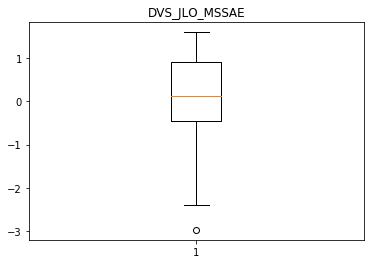

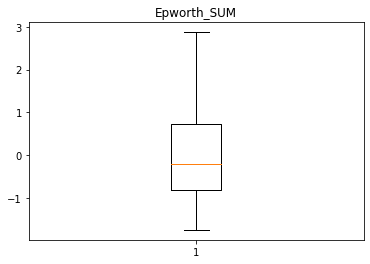

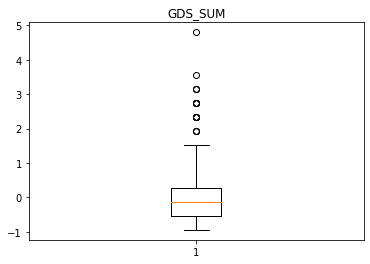

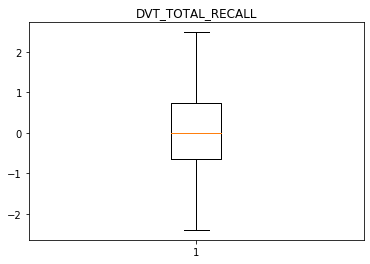

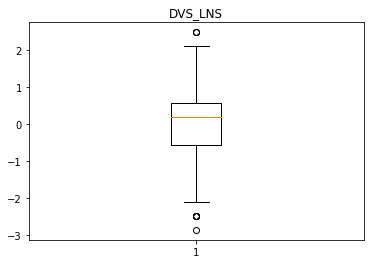

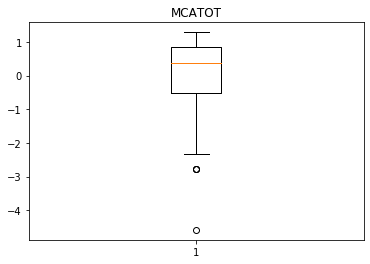

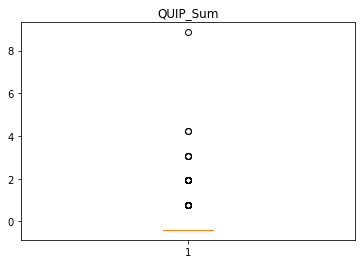

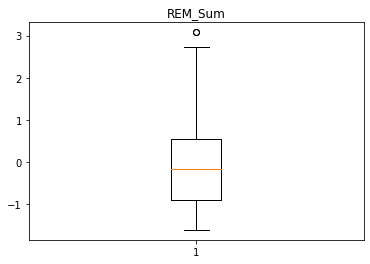

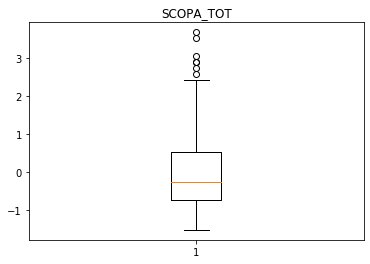

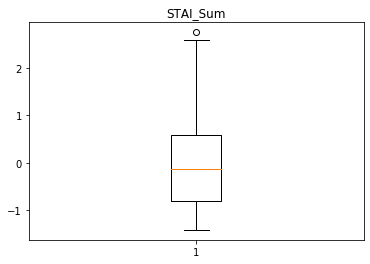

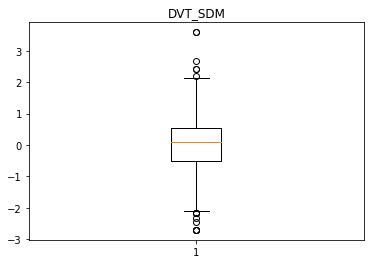

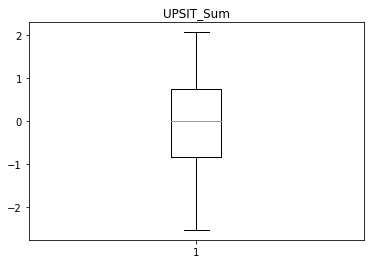

In [40]:
from sklearn.preprocessing import scale

X=whole.iloc[:,1:-1]
Y=whole.iloc[:,-1]
import seaborn as sns
var=scale(X)
warnings.filterwarnings('ignore')
for j in range(np.shape(var)[1]):
    plt.figure()
    plt.title(X.iloc[:,j].name)
    plt.boxplot(var[:,j][~np.isnan(var[:,j])])

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BMI                       259 non-null    float64
 1   SYSSUP                    259 non-null    float64
 2   HRSUP                     259 non-null    float64
 3   age                       259 non-null    float64
 4   gen                       259 non-null    int64  
 5   EDUCYRS                   259 non-null    int64  
 6   ageonset                  259 non-null    float64
 7   agediag                   259 non-null    float64
 8   DOMSIDE                   259 non-null    float64
 9   Cognitive                 259 non-null    float64
 10  Sleep                     259 non-null    float64
 11  Autonomic_Nervous_System  259 non-null    float64
 12  Bulbar                    259 non-null    float64
 13  Common_daily_act          259 non-null    float64
 14  Bed       

# Drop row with missing values, Standardization, Division in train and test

age ageonset 0.9891571682081716
age agediag 0.9983961373158939
ageonset agediag 0.9902903571239872
Axial_Sub_1 Axial_Sub_2 0.8789062990483996
Limb_Brady_Sub Append_Sub 0.8585723799395705
Tremor_Sub Rest_Tremor_Sub 0.8670264656860441


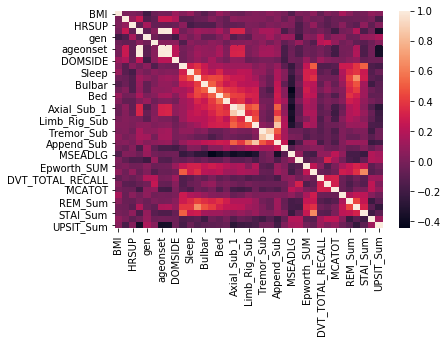

In [42]:
from sklearn.model_selection import train_test_split
#Drop row with missing values
ind=X[X.isna().any(axis=1)].index
X=X.drop(index=ind).reset_index().drop(columns='index')
Y=Y.drop(index=ind).reset_index().drop(columns='index')


    
#Standardization

for col in X.columns:
    if col=='gen' or col=='DOMSIDE':
        continue
    else:
        X[col]=(X[col]-X[col].mean())/X[col].std()
        
#Correlation analysis
corr=X.corr().abs()
sns.heatmap(X.corr())
feat=list(X.columns)
drop=[]
for i in range(len(corr)):
    for j in range(i+1,len(corr)):
            if np.abs(corr.iloc[i,j]) >0.8:
                print(feat[i],feat[j],corr.iloc[i,j])
                drop.append(feat[i])
                drop.append(feat[j])
drop=list(dict.fromkeys(drop))
keep=['age','Axial_Sub_1','Append_Sub','Tremor_Sub']
drop=list(set(drop)-set(keep))
X=X.drop(columns=drop)




In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BMI                       255 non-null    float64
 1   SYSSUP                    255 non-null    float64
 2   HRSUP                     255 non-null    float64
 3   age                       255 non-null    float64
 4   gen                       255 non-null    int64  
 5   EDUCYRS                   255 non-null    float64
 6   DOMSIDE                   255 non-null    float64
 7   Cognitive                 255 non-null    float64
 8   Sleep                     255 non-null    float64
 9   Autonomic_Nervous_System  255 non-null    float64
 10  Bulbar                    255 non-null    float64
 11  Common_daily_act          255 non-null    float64
 12  Bed                       255 non-null    float64
 13  Gait                      255 non-null    float64
 14  Axial_Sub_

In [96]:
X[X['gen']==2]

,BMI,SYSSUP,HRSUP,age,gen,EDUCYRS,DOMSIDE,Cognitive,Sleep,Autonomic_Nervous_System,...,GDS_SUM,DVT_TOTAL_RECALL,DVS_LNS,MCATOT,QUIP_Sum,REM_Sum,SCOPA_TOT,STAI_Sum,DVT_SDM,UPSIT_Sum
1,0.234818,0.369259,-0.345515,0.679588,2,0.171513,1.0,1.160243,0.386625,0.597320,...,0.276097,0.644546,0.565386,0.840289,0.753980,1.282525,1.949401,0.182332,0.186119,-0.589523
2,0.113442,-1.198084,-0.713007,-0.447356,2,0.171513,2.0,-0.181535,1.775210,2.302357,...,-0.537831,0.736213,0.565386,-0.956556,-0.397307,-0.514419,1.006142,-0.815171,-0.855042,0.134370
5,0.802485,0.489824,1.308201,-0.045735,2,0.171513,2.0,0.489354,1.080918,-0.539371,...,0.276097,-1.097131,-1.351813,-1.854978,3.056554,-0.155030,-0.251536,1.179835,-0.855042,0.496316
6,0.167748,0.007565,-0.713007,1.046479,2,0.171513,2.0,1.831132,0.386625,0.028974,...,0.683062,1.652885,-0.584934,0.840289,1.905267,-0.514419,-0.880375,0.293166,0.758757,0.255018
8,-1.562083,-1.620061,-0.804880,0.510707,2,0.171513,2.0,2.502020,0.386625,1.734011,...,1.090026,0.277877,0.181946,-0.058133,1.905267,-0.155030,0.062884,-0.039335,-0.594752,-1.313415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.916187,-2.042038,-0.253642,-1.187851,2,-0.517239,1.0,0.489354,2.469502,1.734011,...,2.310919,-1.647134,-2.118693,-4.550246,-0.397307,1.282525,0.377303,2.288172,-2.677072,1.702803
240,-1.829022,0.670672,-0.069896,0.580957,2,-1.205990,2.0,-0.181535,-0.307667,-0.539371,...,-0.537831,0.827881,-0.968374,-1.854978,-0.397307,-0.873808,0.062884,-0.316419,2.008149,0.616965
250,-0.926663,-0.595259,0.205724,-2.834006,2,-0.517239,1.0,-0.852423,-1.001959,-0.539371,...,-0.537831,0.186210,-1.735253,-1.405767,-0.397307,-0.873808,-0.251536,-0.648920,-0.594752,0.978911
252,0.818066,0.188412,0.205724,-0.113879,2,-0.861615,2.0,0.489354,0.386625,0.597320,...,-0.130867,-0.638795,-1.351813,-0.956556,1.905267,0.563747,0.062884,0.237749,1.097134,0.978911


In [44]:
X['DVT_SDM'].unique()

array([ 0.27253513,  0.18611863, -0.85504167,  0.65464077,  0.02994459,
        0.7587568 , -0.16058794, -0.5947516 , -0.07417144, -1.37562182,
       -1.28920533, -0.5083351 ,  0.57655375,  0.23817665,  0.09970214,
       -0.80298366, -1.11533175,  1.0971339 , -0.20431648, -2.15649205,
       -0.42087802, -2.07007576,  0.31626367,  0.44640871,  0.55052474,
        2.1382942 ,  1.22727894, -0.33446152,  2.65887435,  0.13406062,
       -1.32356381,  0.83684382,  0.96698886,  0.34229268, -1.98261827,
        0.86287283,  0.05597359, -0.69886763,  0.35999221, -0.24804502,
        3.56988962,  1.35742397,  1.7999171 ,  0.70669878,  1.87800413,
       -1.6359119 , -0.72489663, -2.28663709, -1.76605694, -0.98518671,
        0.01224505,  2.39858428, -1.50576686, -0.46460656, -1.24547679,
       -2.6770722 ,  2.18202274, -1.89620198, -2.41678213, -0.90709969,
       -1.21944778,  2.00814916,  1.31369543, -1.80978568])

In [45]:
#Division in train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,stratify=Y)

In [46]:
print('X_train:',len(X_train))
print('X_test:',len(X_test))
print('y_train early:',len(y_train[y_train['Class']==1]))
print('y_train others:',len(y_train[y_train['Class']==0]))
print('y_test early:',len(y_test[y_test['Class']==1]))
print('y_test others:',len(y_test[y_test['Class']==0]))

X_train: 229
X_test: 26
y_train early: 52
y_train others: 177
y_test early: 6
y_test others: 20


# Models without feature selection

In [41]:
#Model without feature selection
from sklearn.metrics import f1_score,confusion_matrix,precision_score,balanced_accuracy_score,recall_score,accuracy_score,roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif,RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

models=[RandomForestClassifier(n_estimators=5,n_jobs=-1,class_weight='balanced_subsample',bootstrap=True,random_state=0),
       GaussianNB(),LogisticRegression(class_weight='balanced'),DummyClassifier(strategy='most_frequent'),
        SGDClassifier('log',class_weight='balanced',learning_rate='adaptive',eta0=0.001), DecisionTreeClassifier(class_weight='balanced',),
        AdaBoostClassifier(n_estimators=30,random_state=0),GradientBoostingClassifier(n_estimators=10,random_state=0)]
model_names=['RF','GNB','LOG_Reg','Dummy','SGDClass','DecTree','ADA','GBC']

for model,model_name in zip(models,model_names):
    print(model_name)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('F1:',f1_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('Confusion matrix:\n',confusion_matrix(y_test,y_pred))
    print('Accuracy:',balanced_accuracy_score(y_test,y_pred))
    try:
        print('Roc AUC:',roc_auc_score(y_test,y_pred))
    except:
        print('ROC AUC: Nan')
    print('\n')

RF


NameError: name 'X_train' is not defined

# SMOTE on original training set

In [45]:
from collections import Counter
from imblearn.over_sampling import SMOTENC,BorderlineSMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score

models=[RandomForestClassifier(n_estimators=10,n_jobs=-1,bootstrap=True),
       GaussianNB(),LogisticRegression(),
        SGDClassifier('log',learning_rate='adaptive',eta0=0.001), DecisionTreeClassifier(),
        AdaBoostClassifier()]
model_names=['RF','GNB','LOG_Reg','SGDClass','DecTree','ADA']
for model,model_name in zip(models,model_names):
    print(model_name)
    print(Counter(y_train['Class']))
    oversample = SMOTENC(categorical_features=[1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,
                                              22,23,24,25,26,27,28,29,30,31],k_neighbors=1)
    X_train_s, y_train_s = oversample.fit_sample(X_train, y_train)
    print(Counter(y_train_s['Class']))
    model.fit(X_train_s,y_train_s)
    y_pred=model.predict(X_test)
    y_prob=model.predict_proba(X_test)
    print('F1:',f1_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('Confusion matrix:\n',confusion_matrix(y_test,y_pred))
    print('Accuracy:',balanced_accuracy_score(y_test,y_pred))
    try:
        print('Roc AUC:',roc_auc_score(y_test,y_prob))
    except:
        print('ROC AUC: Nan')
    print('\n')

RF


NameError: name 'y_train' is not defined

# SMOTE + UNDERSAMPLE 

In [48]:
from imblearn.under_sampling import RandomUnderSampler

models=[RandomForestClassifier(n_estimators=10,n_jobs=-1,bootstrap=True),
       GaussianNB(),LogisticRegression(),
        SGDClassifier('log',learning_rate='adaptive',eta0=0.001), DecisionTreeClassifier(),
        AdaBoostClassifier()]
model_names=['RF','GNB','LOG_Reg','SGDClass','DecTree','ADA']
for model,model_name in zip(models,model_names):
    print(model_name)
    print(Counter(y_train['Class']))
    oversample =SMOTENC(categorical_features=[1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,
                                            22,23,24,25,26,27,28,29,30,31],sampling_strategy=1,k_neighbors=1)
    undersample=RandomUnderSampler(0.5)
    
    X_train_s,y_train_s= undersample.fit_resample(X_train,y_train)
    X_train_s, y_train_s = oversample.fit_resample(X_train_s, y_train_s)
    
    print(Counter(y_train_s['Class']))
    model.fit(X_train_s,y_train_s)
    y_pred=model.predict(X_test)
    print('F1:',f1_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('Confusion matrix:\n',confusion_matrix(y_test,y_pred))
    print('Accuracy:',balanced_accuracy_score(y_test,y_pred))
    try:
        print('Roc AUC:',roc_auc_score(y_test,y_pred))
    except:
        print('ROC AUC: Nan')
    print('\n')

RF
Counter({0: 151, 1: 42})
Counter({0: 84, 1: 84})
F1: 0.5
Precision: 0.42857142857142855
Recall: 0.6
Confusion matrix:
 [[13  4]
 [ 2  3]]
Accuracy: 0.6823529411764706
Roc AUC: 0.6823529411764706


GNB
Counter({0: 151, 1: 42})
Counter({0: 84, 1: 84})
F1: 0.3076923076923077
Precision: 0.25
Recall: 0.4
Confusion matrix:
 [[11  6]
 [ 3  2]]
Accuracy: 0.5235294117647059
Roc AUC: 0.5235294117647058


LOG_Reg
Counter({0: 151, 1: 42})
Counter({0: 84, 1: 84})
F1: 0.3076923076923077
Precision: 0.25
Recall: 0.4
Confusion matrix:
 [[11  6]
 [ 3  2]]
Accuracy: 0.5235294117647059
Roc AUC: 0.5235294117647058


SGDClass
Counter({0: 151, 1: 42})
Counter({0: 84, 1: 84})
F1: 0.42857142857142855
Precision: 0.3333333333333333
Recall: 0.6
Confusion matrix:
 [[11  6]
 [ 2  3]]
Accuracy: 0.6235294117647059
Roc AUC: 0.6235294117647058


DecTree
Counter({0: 151, 1: 42})
Counter({0: 84, 1: 84})
F1: 0.16666666666666666
Precision: 0.14285714285714285
Recall: 0.2
Confusion matrix:
 [[11  6]
 [ 4  1]]
Accuracy: 0

# feature selection with K-Fold cross val on training set.
# test performances on test set

In [46]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
models=[RandomForestClassifier(n_estimators=10,n_jobs=-1,bootstrap=True,class_weight='balanced_subsample'),
       GaussianNB(),LogisticRegression(class_weight='balanced'),DummyClassifier(strategy='most_frequent'),
        SGDClassifier('log',learning_rate='adaptive',eta0=0.01,class_weight='balanced'), DecisionTreeClassifier(class_weight='balanced'),
        AdaBoostClassifier(n_estimators=10),GradientBoostingClassifier(n_estimators=10)]

model_names=['RF','GNB','LOG_Reg','Dummy','SGDClass','DecTree','ADA','GBC']
n_feat=10
for model,model_name in zip(models,model_names):
    feat={key:0 for key in X_train.columns}
    print(model_name)
    skf=StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    for train_index, test_index in skf.split(X_train, y_train):
        X_train_K, X_test_K = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
        y_train_K, y_test_K = y_train.iloc[train_index,:], y_train.iloc[test_index,:]
        selector = SelectKBest(mutual_info_classif, k=n_feat)
        selector.fit(X_train_K, y_train_K)
        support = selector.get_support()
        for j in X_train_K.loc[:,support].columns.to_list():
            feat[j]+=1
    feat={k: v for k, v in sorted(feat.items(), key=lambda feat: feat[1],reverse=True)}
    support=list(feat.keys())[:n_feat+1]
    X_train_feat=X_train.loc[:,support]
    X_test_feat=X_test.loc[:,support]
    model.fit(X_train_feat,y_train)
    y_pred=model.predict(X_test_feat)
    y_prob=model.predict_proba(X_test_feat)
    print('F1:',f1_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('Confusion matrix:\n',confusion_matrix(y_test,y_pred))
    print('Accuracy:',balanced_accuracy_score(y_test,y_pred))
    try:
        print('Roc AUC:',roc_auc_score(y_test,y_prob))
    except:
        print('ROC AUC: Nan')
    print('\n')
    
    
        

NameError: name 'X_train' is not defined

# K-Fold cross validation

In [48]:
from sklearn.model_selection import StratifiedKFold,RepeatedKFold
from sklearn.feature_selection import mutual_info_classif

models=[RandomForestClassifier(n_estimators=10,n_jobs=-1,bootstrap=True,class_weight='balanced_subsample'),
       GaussianNB(),LogisticRegression(class_weight='balanced'),DummyClassifier(strategy='most_frequent'),
        SGDClassifier('log',learning_rate='adaptive',eta0=0.01,class_weight='balanced'), DecisionTreeClassifier(class_weight='balanced'),
        AdaBoostClassifier(n_estimators=10),GradientBoostingClassifier(n_estimators=10)]

model_names=['RF','GNB','LOG_Reg','Dummy','SGDClass','DecTree','ADA','GBC']
for model,model_name in zip(models,model_names):
    acc,f1,p,r,accb,roc = [],[],[],[],[],[]
    print(model_name)
    skf=StratifiedKFold(n_splits=7,random_state=0,shuffle=True)
    for train_index, test_index in skf.split(X, Y):
        X_train_K, X_test_K = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train_K, y_test_K = Y.iloc[train_index,:], Y.iloc[test_index,:]
        # select best features on training 
        #print(list(X_train_K.columns))
    
        model = model.fit(X_train_K,y_train_K.values.ravel())
        y_pred = model.predict(X_test_K)
        y_prob=model.predict_proba(X_test_K)[:,1]
        acc.append(accuracy_score(y_test_K,y_pred))
        f1.append(f1_score(y_test_K,y_pred))
        p.append(precision_score(y_test_K,y_pred))
        r.append(recall_score(y_test_K,y_pred))
        accb.append(balanced_accuracy_score(y_test_K,y_pred))
        try:
            roc.append(roc_auc_score(y_test_K,y_prob))
        except:
            roc.append(np.nan)
        

    print('Acc mean',np.mean(acc))    
    print('F1 mean',np.mean(f1))
    print('Precision mean',np.mean(p))
    print('Recall mean',np.mean(r))
    print('Balance Acc mean',np.mean(accb))
    try:
        print('Roc AUC:',np.mean(roc))
    except:
        print('ROC AUC: Nan')
    print('\n')

RF
Acc mean 0.7611540111540112
F1 mean 0.06031746031746032
Precision mean 0.21428571428571427
Recall mean 0.03571428571428571
Balance Acc mean 0.50536593947924
Roc AUC: 0.4716174544530456


GNB
Acc mean 0.7139639639639641
F1 mean 0.3137765362555278
Precision mean 0.3807256235827664
Recall mean 0.2757936507936508
Balance Acc mean 0.5594309562905623
Roc AUC: 0.621508229728673


LOG_Reg
Acc mean 0.6006006006006006
F1 mean 0.3461943479498236
Precision mean 0.27801414272002506
Recall mean 0.4662698412698413
Balance Acc mean 0.5529801000860114
Roc AUC: 0.57127707404801


Dummy
Acc mean 0.7726297726297726
F1 mean 0.0
Precision mean 0.0
Recall mean 0.0
Balance Acc mean 0.5
Roc AUC: 0.5


SGDClass
Acc mean 0.5968468468468469
F1 mean 0.34458928235325753
Precision mean 0.2766342366906277
Recall mean 0.4642857142857143
Balance Acc mean 0.5495249824067557
Roc AUC: 0.5773662913441238


DecTree
Acc mean 0.6784641784641785
F1 mean 0.29542691570555346
Precision mean 0.3114718614718615
Recall mean 0.293

# K-Fold Cross validation + smote

In [50]:

models=[RandomForestClassifier(n_estimators=10,n_jobs=-1,bootstrap=True,class_weight='balanced_subsample'),
       GaussianNB(),LogisticRegression(class_weight='balanced'),DummyClassifier(strategy='most_frequent'),
        SGDClassifier('log',learning_rate='adaptive',eta0=0.01,class_weight='balanced'), DecisionTreeClassifier(class_weight='balanced'),
        AdaBoostClassifier(n_estimators=10),GradientBoostingClassifier(n_estimators=10)]

model_names=['RF','GNB','LOG_Reg','Dummy','SGDClass','DecTree','ADA','GBC']
for model,model_name in zip(models,model_names):
    acc,f1,p,r,accb,roc = [],[],[],[],[],[]
    print(model_name)
    skf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
    for train_index, test_index in skf.split(X, Y):
        X_train_K, X_test_K = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train_K, y_test_K = Y.iloc[train_index,:], Y.iloc[test_index,:]
                


        oversample =SMOTENC(categorical_features=[1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,
                                            22,23,24,25,26,27,28,29,30],sampling_strategy=1,k_neighbors=1)
        undersample=RandomUnderSampler(0.5)
        X_train_K, y_train_K = undersample.fit_resample(X_train_K, y_train_K)
        X_train_K, y_train_K = oversample.fit_resample(X_train_K, y_train_K)
        model = model.fit(X_train_K,y_train_K.values.ravel())
        y_pred = model.predict(X_test_K)
        y_prob=model.predict_proba(X_test_K)[:,1]
        acc.append(accuracy_score(y_test_K,y_pred))
        f1.append(f1_score(y_test_K,y_pred))
        p.append(precision_score(y_test_K,y_pred))
        r.append(recall_score(y_test_K,y_pred))
        accb.append(balanced_accuracy_score(y_test_K,y_pred))
        try:
            roc.append(roc_auc_score(y_test_K,y_prob))
        except:
            roc.append(np.nan)


    print('Acc mean',np.mean(acc))    
    print('F1 mean',np.mean(f1))
    print('Precision mean',np.mean(p))
    print('Recall mean',np.mean(r))
    print('Balance Acc mean',np.mean(accb))
    try:
        print('Roc AUC:',np.mean(roc))
    except:
        print('ROC AUC: Nan')
    print('\n')

RF
Acc mean 0.6470588235294118
F1 mean 0.20355675513570248
Precision mean 0.2337301587301587
Recall mean 0.1893939393939394
Balance Acc mean 0.4857867132867133
Roc AUC: 0.5470376845376845


GNB
Acc mean 0.6
F1 mean 0.34693503664091896
Precision mean 0.27929824561403505
Recall mean 0.46515151515151515
Balance Acc mean 0.552511655011655
Roc AUC: 0.6071328671328671


LOG_Reg
Acc mean 0.6078431372549019
F1 mean 0.36314526131970354
Precision mean 0.2896407258555596
Recall mean 0.4954545454545454
Balance Acc mean 0.5675990675990676
Roc AUC: 0.5462121212121213


Dummy
Acc mean 0.7725490196078431
F1 mean 0.0
Precision mean 0.0
Recall mean 0.0
Balance Acc mean 0.5
Roc AUC: 0.5


SGDClass
Acc mean 0.6156862745098038
F1 mean 0.3656520713250413
Precision mean 0.29642555586828034
Recall mean 0.48030303030303034
Balance Acc mean 0.5678438228438228
Roc AUC: 0.6027078477078478


DecTree
Acc mean 0.5882352941176471
F1 mean 0.31492257742257745
Precision mean 0.26753812636165575
Recall mean 0.41515151515

# K-Fold +SMOTE+ feat

In [43]:
from sklearn.model_selection import StratifiedKFold,RepeatedKFold,LeaveOneOut
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import mannwhitneyu
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE,SMOTENC
#model=DecisionTreeClassifier(class_weight='balanced')
#model=GradientBoostingClassifier(n_estimators=100)
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1,shuffle=True)
model=LogisticRegression(class_weight='balanced')
#model=GaussianNB()
#model=RandomForestClassifier(n_estimators=100,n_jobs=-1,bootstrap=True,class_weight='balanced_subsample')
#model=SGDClassifier('log',learning_rate='adaptive',eta0=0.005,class_weight='balanced')
n_feat=[1,2,3,4,5,6,7,8,9,10]
#X=X.drop(columns=['Diff_BL_1yr'])
for f in n_feat:
    print('\nN Feat:',f)
    
    skf=StratifiedKFold(n_splits=10,random_state=1,shuffle=False)
    skf1=StratifiedKFold(n_splits=10,random_state=1,shuffle=False)
    loo=LeaveOneOut()
    acc,f1,p,r,accb,roc,brier,mcc = [],[],[],[],[],[],[],[]
    tot_feat={key:0 for key in X.columns}    
    for train_index, test_index in skf1.split(X, Y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = Y.iloc[train_index,:], Y.iloc[test_index,:]
        y_p=[]
        y_t=[]
        feat={key:0 for key in X.columns}
        for train_index, test_index in skf.split(X_train, y_train):
            X_train_K, X_test_K = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
            y_train_K, y_test_K = y_train.iloc[train_index,:], y_train.iloc[test_index,:]


            ###VARIABLE RANKING
            rank={key:0 for key in X_train.columns}
            for j in X_train.columns:
                rank[j]=mannwhitneyu(X_train_K[y_train_K['Class']==0][j],X_train_K[y_train_K['Class']==1][j])[1]
            rank={k: v for k, v in sorted(rank.items(), key=lambda item: item[1],reverse=False)}  
            support=list(rank.keys())[0:f]
            
            #selector=RFE(LogisticRegression(class_weight='balanced'),f)
            #selector=selector.fit(X_train_K,y_train_K)
            #support=selector.support_
            

            ###INCREMENT FEATURE COUNTER
            for j in X_train_K.loc[:,support].columns.to_list():
                feat[j]+=1
                tot_feat[j]+=1
                

            ###SELECT BEST N FEAT
            X_train_K = X_train_K.loc[:,support]
            #X_test_K = X_test_K.loc[:,support]


            ###SMOTE
            under=RandomUnderSampler(0.5,random_state=0)
            oversample=SMOTENC(sampling_strategy=1,categorical_features=[i for i in range(f)],k_neighbors=5,random_state=0)
            #X_train_K,y_train_K=under.fit_resample(X_train_K,y_train_K)
            #X_train_K, y_train_K = oversample.fit_resample(X_train_K, y_train_K)



            #model = model.fit(X_train_K,y_train_K.values.ravel())

            #y_pred = model.predict(X_test_K)
            #y_p.append(np.asscalar(y_pred))
            #y_t.append(np.asscalar(y_test_K.values))


        #print('TRAIN')
        #print(accuracy_score(y_t,y_p))
        #print(f1_score(y_t,y_p))
        #print(precision_score(y_t,y_p))
        #print(recall_score(y_t,y_p))
        #print(balanced_accuracy_score(y_t,y_p))
        #print(roc_auc_score(y_t,y_p))
        #print(confusion_matrix(y_t,y_p))


        print('TEST')
        tot_feat={k: v for k, v in sorted(tot_feat.items(), key=lambda item: item[1],reverse=True)}
        feat={k: v for k, v in sorted(feat.items(), key=lambda item: item[1],reverse=True)}
        print(list(feat.keys())[0:f])

        X_train_ov=X_train.loc[:,list(feat.keys())[0:f]]
        X_test_ov=X_test.loc[:,list(feat.keys())[0:f]]
        
        X_train_ov,y_train_ov=under.fit_resample(X_train_ov, y_train)
        
        X_train_ov['temp']=0
        X_train_ov, y_train_ov = oversample.fit_resample(X_train_ov, y_train_ov)
        X_train_ov=X_train_ov.drop(columns=['temp'])
        
        model=model.fit(X_train_ov,y_train_ov)
        
        y_pred=model.predict(X_test_ov)
        y_prob=model.predict_proba(X_test_ov)[:,1]

        acc.append(accuracy_score(y_test,y_pred))
        f1.append(f1_score(y_test,y_pred))
        p.append(precision_score(y_test,y_pred))
        r.append(recall_score(y_test,y_pred))
        accb.append(balanced_accuracy_score(y_test,y_pred))
        roc.append(roc_auc_score(y_test,y_prob))
        brier.append(brier_score_loss(y_test,y_pred))
        mcc.append(matthews_corrcoef(y_test,y_pred))
        

    print('Acc mean',np.mean(acc))    
    print('F1 mean',np.mean(f1))
    print('Precision mean',np.mean(p))
    print('Recall mean',np.mean(r))
    print('Balance Acc mean',np.mean(accb))
    try:
        print('Roc AUC:',np.mean(roc))
    except:
        print('ROC AUC: Nan')
    print('Brier',np.mean(brier))
    print('MCC',np.mean(mcc))
    
    tot_feat={k: v for k, v in sorted(tot_feat.items(), key=lambda item: item[1],reverse=True)}
    print(tot_feat)


N Feat: 1
TEST
['Cognitive']
TEST
['BMI']
TEST
['Sleep']
TEST
['BMI']
TEST
['Sleep']
TEST
['Sleep']
TEST
['Append_Sub']
TEST
['Sleep']
TEST
['BMI']
TEST
['BMI']
Acc mean 0.524923076923077
F1 mean 0.27634467184002787
Precision mean 0.20576631701631704
Recall mean 0.43
Balance Acc mean 0.49131578947368426
Roc AUC: 0.4706184210526317
Brier 0.47507692307692306
MCC -0.020671384515213866
{'Sleep': 29, 'BMI': 28, 'SCOPA_TOT': 19, 'Cognitive': 15, 'Append_Sub': 8, 'REM_Sum': 1, 'SYSSUP': 0, 'HRSUP': 0, 'age': 0, 'gen': 0, 'EDUCYRS': 0, 'DOMSIDE': 0, 'Autonomic_Nervous_System': 0, 'Bulbar': 0, 'Common_daily_act': 0, 'Bed': 0, 'Gait': 0, 'Axial_Sub_1': 0, 'Limb_Rig_Sub': 0, 'Tremor_Sub': 0, 'Asymmetry': 0, 'MSEADLG': 0, 'DVS_JLO_MSSAE': 0, 'Epworth_SUM': 0, 'GDS_SUM': 0, 'DVT_TOTAL_RECALL': 0, 'DVS_LNS': 0, 'MCATOT': 0, 'QUIP_Sum': 0, 'STAI_Sum': 0, 'DVT_SDM': 0, 'UPSIT_Sum': 0}

N Feat: 2
TEST
['Cognitive', 'BMI']
TEST
['BMI', 'Append_Sub']
TEST
['Sleep', 'Cognitive']
TEST
['BMI', 'SCOPA_TOT']

TEST
['Cognitive', 'Autonomic_Nervous_System', 'SCOPA_TOT', 'BMI', 'Append_Sub', 'REM_Sum', 'Sleep', 'Common_daily_act']
TEST
['BMI', 'Cognitive', 'Append_Sub', 'SCOPA_TOT', 'REM_Sum', 'Sleep', 'GDS_SUM', 'QUIP_Sum']
TEST
['BMI', 'Cognitive', 'Sleep', 'Append_Sub', 'REM_Sum', 'SCOPA_TOT', 'Autonomic_Nervous_System', 'QUIP_Sum']
TEST
['BMI', 'Cognitive', 'Sleep', 'Autonomic_Nervous_System', 'Append_Sub', 'REM_Sum', 'SCOPA_TOT', 'STAI_Sum']
TEST
['BMI', 'Cognitive', 'Sleep', 'SCOPA_TOT', 'Common_daily_act', 'Append_Sub', 'Autonomic_Nervous_System', 'GDS_SUM']
TEST
['Cognitive', 'Sleep', 'Autonomic_Nervous_System', 'SCOPA_TOT', 'BMI', 'Bulbar', 'Append_Sub', 'REM_Sum']
TEST
['Cognitive', 'Append_Sub', 'SCOPA_TOT', 'BMI', 'GDS_SUM', 'Sleep', 'Autonomic_Nervous_System', 'STAI_Sum']
TEST
['BMI', 'Cognitive', 'Sleep', 'SCOPA_TOT', 'Append_Sub', 'QUIP_Sum', 'Autonomic_Nervous_System', 'GDS_SUM']
TEST
['BMI', 'Cognitive', 'Sleep', 'Autonomic_Nervous_System', 'Append_Sub', 'SCOPA_TOT', 'Common_d

In [48]:
print(X)

          BMI    SYSSUP     HRSUP       age  gen   EDUCYRS  DOMSIDE  \
0   -1.085387  0.972084 -0.437388  0.426853    1  0.171513      2.0   
1    0.234818  0.369259 -0.345515  0.679588    2  0.171513      1.0   
2    0.113442 -1.198084 -0.713007 -0.447356    2  0.171513      2.0   
3    0.314586  0.610389 -1.447992 -1.459306    1  0.171513      1.0   
4   -0.558909 -1.800908  0.848835 -0.229300    1  0.171513      2.0   
..        ...       ...       ...       ...  ...       ...      ...   
250 -0.926663 -0.595259  0.205724 -2.834006    2 -0.517239      1.0   
251 -0.043508  0.610389  0.665089  0.575530    1  0.171513      2.0   
252  0.818066  0.188412  0.205724 -0.113879    2 -0.861615      2.0   
253  0.920738  0.489824  0.297597 -0.078370    2  0.171513      2.0   
254  2.924125 -0.595259 -0.161769 -0.549422    1 -1.205990      2.0   

     Cognitive     Sleep  Autonomic_Nervous_System  ...   GDS_SUM  \
0    -0.852423  1.080918                  1.734011  ... -0.537831   
1     1.1

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures as pol
from sklearn.pipeline import make_pipeline
model_pol=make_pipeline(pol(10),LinearRegression())
lab=prog.loc[:,['PATNO','Diff_BL_4yr']].dropna()
dat=whole.merge(lab,how='left',on='PATNO').dropna()
dat

,PATNO,BMI,SYSSUP,HRSUP,age,gen,EDUCYRS,ageonset,agediag,DOMSIDE,...,MCATOT,QUIP_Sum,REM_Sum,SCOPA_TOT,STAI_Sum,DVT_SDM,UPSIT_Sum,Diff_BL_1yr,Class,Diff_BL_4yr
0,3001,22.156529,146.0,63.0,65.1425,1,16,63.5918,64.2603,2.0,...,29.0,1.0,4.0,12.0,51.0,48.330002,25.0,8.0,1,27.0
1,3002,28.280724,136.0,64.0,67.5781,2,16,65.5205,66.5041,1.0,...,29.0,1.0,8.0,22.0,69.0,47.500000,17.0,10.0,0,12.0
2,3003,27.717685,110.0,60.0,56.7178,2,16,51.8274,54.6685,2.0,...,25.0,0.0,3.0,16.0,51.0,37.500000,23.0,15.0,1,30.0
3,3010,28.650756,140.0,52.0,46.9657,1,16,45.9657,46.6068,1.0,...,26.0,0.0,10.0,9.0,72.0,52.000000,9.0,12.0,1,29.0
4,3012,24.598765,100.0,77.0,58.8192,1,16,55.5462,58.5342,2.0,...,27.0,0.0,9.0,14.0,71.0,46.000000,15.0,13.0,0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,4113,22.892820,120.0,70.0,33.7178,2,14,30.9918,31.8384,1.0,...,24.0,0.0,2.0,8.0,54.0,40.000000,30.0,11.0,0,14.0
215,4115,26.989619,140.0,75.0,66.5753,1,16,64.5589,66.4000,2.0,...,28.0,2.0,9.0,11.0,48.0,53.000000,27.0,-3.0,0,9.0
216,4117,30.986310,133.0,70.0,59.9315,2,13,58.5699,59.7014,2.0,...,25.0,2.0,6.0,10.0,70.0,56.250000,30.0,5.0,0,9.0
217,4123,31.462585,138.0,71.0,60.2737,2,16,59.5383,59.9235,2.0,...,25.0,0.0,4.0,2.0,61.0,47.000000,29.0,-13.0,0,-15.0


In [136]:
#dat=dat.drop(columns=['PATNO','Diff_BL_1yr','Class'])
X_reg=dat.iloc[:,:-1]
Y_reg=dat.iloc[:,-1]

0      27.0
1      12.0
2      30.0
3      29.0
4      12.0
       ... 
214    14.0
215     9.0
216     9.0
217   -15.0
218    10.0
Name: Diff_BL_4yr, Length: 215, dtype: float64

In [137]:
for col in X_reg.columns:
    if col=='gen' or col=='DOMSIDE':
        continue
    else:
        X_reg[col]=(X_reg[col]-X_reg[col].mean())/X_reg[col].std()


,BMI,SYSSUP,HRSUP,age,gen,EDUCYRS,ageonset,agediag,DOMSIDE,Cognitive,...,GDS_SUM,DVT_TOTAL_RECALL,DVS_LNS,MCATOT,QUIP_Sum,REM_Sum,SCOPA_TOT,STAI_Sum,DVT_SDM,UPSIT_Sum
0,-1.125481,0.947625,-0.408329,0.465707,1,0.187265,0.488207,0.430890,2.0,-0.871216,...,-0.549097,0.509697,2.068632,0.855192,0.660398,-0.147989,0.318936,-0.856103,0.280560,0.377929
1,0.270599,0.360141,-0.315034,0.723032,2,0.187265,0.689188,0.668611,1.0,1.114417,...,0.251282,0.696543,0.541573,0.855192,0.660398,1.250592,1.846138,0.132888,0.193971,-0.566893
2,0.142248,-1.167316,-0.688214,-0.424376,2,0.187265,-0.737708,-0.585318,2.0,-0.209338,...,-0.549097,0.789965,0.541573,-0.929918,-0.415250,-0.497635,0.929817,-0.856103,-0.849273,0.141723
3,0.354952,0.595135,-1.434574,-1.454701,1,0.187265,-1.348529,-1.439419,1.0,0.452540,...,0.251282,-0.331108,0.923338,-0.483640,-0.415250,1.949883,-0.139224,0.297719,0.663430,-1.511716
4,-0.568745,-1.754800,0.897802,-0.202360,1,0.187265,-0.350189,-0.175764,2.0,1.776295,...,0.651472,-0.424530,-0.221956,-0.037363,-0.415250,1.600238,0.624377,0.242775,0.037484,-0.803099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,-0.957635,-0.579833,0.244737,-2.854363,2,-0.483767,-2.908890,-3.004066,1.0,-0.871216,...,-0.549097,0.229429,-1.749015,-1.376196,-0.415250,-0.847280,-0.291944,-0.691271,-0.588462,0.968443
215,-0.023723,0.595135,0.711212,0.617084,1,0.187265,0.588984,0.657582,2.0,-0.871216,...,-0.148908,0.509697,0.541573,0.408915,1.736046,1.600238,0.166216,-1.020934,0.767755,0.614135
216,0.887368,0.183896,0.244737,-0.084844,2,-0.819283,-0.035103,-0.052105,2.0,0.452540,...,-0.148908,-0.611376,-1.367250,-0.929918,1.736046,0.551301,0.013496,0.187831,1.106809,0.968443
217,0.995941,0.477638,0.338032,-0.048690,2,0.187265,0.065810,-0.028574,2.0,-0.871216,...,-0.549097,-1.732449,0.541573,-0.929918,-0.415250,-0.147989,-1.208265,-0.306664,0.141808,0.850340


In [162]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,LogisticRegression,ElasticNet
from sklearn.preprocessing import PolynomialFeatures as pol
from sklearn.model_selection import KFold
from sklearn.feature_selection import f_regression
model=make_pipeline(pol(1),LinearRegression())
model=ElasticNet()
for f in n_feat:
    print('\nN Feat:',f)
    skf=KFold(n_splits=10,random_state=1,shuffle=False)
    skf1=KFold(n_splits=10,random_state=1,shuffle=False)
    loo=LeaveOneOut()
    acc,f1,p,r,accb,roc,brier,mcc = [],[],[],[],[],[],[],[]
    tot_feat={key:0 for key in X.columns}    
    for train_index, test_index in skf1.split(X_reg, Y_reg):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = Y.iloc[train_index,:], Y.iloc[test_index,:]
        y_p=[]
        y_t=[]
        feat={key:0 for key in X.columns}
        for train_index, test_index in skf.split(X_train, y_train):
            X_train_K, X_test_K = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
            y_train_K, y_test_K = y_train.iloc[train_index,:], y_train.iloc[test_index,:]


            ###VARIABLE RANKING
            #rank={key:0 for key in X_train.columns}
            #for j in X_train.columns:
            #    rank[j]=mannwhitneyu(X_train_K[y_train_K['Class']==0][j],X_train_K[y_train_K['Class']==1][j])[1]
            #rank={k: v for k, v in sorted(rank.items(), key=lambda item: item[1],reverse=False)}  
            #support=list(rank.keys())[0:f]
            
            #selector=SelectKBest(f_regression,f)
            #selector.fit(X_train_K,y_train_K)
            #support=selector.get_support()
            
            
            selector=RFE(LogisticRegression(class_weight='balanced'),f)
            selector=selector.fit(X_train_K,y_train_K)
            support=selector.support_
            
            ###INCREMENT FEATURE COUNTER
            for j in X_train_K.loc[:,support].columns.to_list():
                feat[j]+=1
                tot_feat[j]+=1

            ###SELECT BEST N FEAT
            X_train_K = X_train_K.loc[:,support]
            #X_test_K = X_test_K.loc[:,support]


            ###SMOTE
            under=RandomUnderSampler(0.5,random_state=0)
            oversample=SMOTE(sampling_strategy=1,k_neighbors=5,random_state=0)
            #X_train_K,y_train_K=under.fit_resample(X_train_K,y_train_K)
            #X_train_K, y_train_K = oversample.fit_resample(X_train_K, y_train_K)



            #model = model.fit(X_train_K,y_train_K.values.ravel())

            #y_pred = model.predict(X_test_K)
            #y_p.append(np.asscalar(y_pred))
            #y_t.append(np.asscalar(y_test_K.values))


        #print('TRAIN')
        #print(accuracy_score(y_t,y_p))
        #print(f1_score(y_t,y_p))
        #print(precision_score(y_t,y_p))
        #print(recall_score(y_t,y_p))
        #print(balanced_accuracy_score(y_t,y_p))
        #print(roc_auc_score(y_t,y_p))
        #print(confusion_matrix(y_t,y_p))


        print('TEST')
        tot_feat={k: v for k, v in sorted(tot_feat.items(), key=lambda item: item[1],reverse=True)}
        feat={k: v for k, v in sorted(feat.items(), key=lambda item: item[1],reverse=True)}
        print(list(feat.keys())[0:f])

        X_train_ov=X_train.loc[:,list(feat.keys())[0:f]]
        X_test_ov=X_test.loc[:,list(feat.keys())[0:f]]
        
        #X_train_ov,y_train_ov=under.fit_resample(X_train_ov, y_train)
        #X_train_ov, y_train_ov = oversample.fit_resample(X_train_ov, y_train_ov)
        
        model=model.fit(X_train_ov,y_train)
        
        y_pred=model.predict(X_test_ov)

        acc.append(mean_squared_error(y_test,y_pred))
        f1.append(r2_score(y_test,y_pred))
        #p.append(precision_score(y_test,y_pred))
        #r.append(recall_score(y_test,y_pred))
        #accb.append(balanced_accuracy_score(y_test,y_pred))
        #roc.append(roc_auc_score(y_test,y_pred))
        #brier.append(brier_score_loss(y_test,y_pred))
        #mcc.append(matthews_corrcoef(y_test,y_pred))
        

    print('MSE mean',np.mean(acc))    
    print('R2 mean',np.mean(f1))
    
    tot_feat={k: v for k, v in sorted(tot_feat.items(), key=lambda item: item[1],reverse=True)}
    print(tot_feat)


N Feat: 1
TEST
['Diff_BL_1yr']
TEST
['Diff_BL_1yr']
TEST
['Diff_BL_1yr']
TEST
['Diff_BL_1yr']
TEST
['Diff_BL_1yr']
TEST
['Diff_BL_1yr']
TEST
['Diff_BL_1yr']
TEST
['Diff_BL_1yr']
TEST
['Diff_BL_1yr']
TEST
['Diff_BL_1yr']
MSE mean 0.17247435190997967
R2 mean -0.07485942078163654
{'Diff_BL_1yr': 100, 'BMI': 0, 'SYSSUP': 0, 'HRSUP': 0, 'age': 0, 'gen': 0, 'EDUCYRS': 0, 'DOMSIDE': 0, 'Cognitive': 0, 'Sleep': 0, 'Autonomic_Nervous_System': 0, 'Bulbar': 0, 'Common_daily_act': 0, 'Bed': 0, 'Gait': 0, 'Axial_Sub_1': 0, 'Limb_Rig_Sub': 0, 'Tremor_Sub': 0, 'Append_Sub': 0, 'MSEADLG': 0, 'DVS_JLO_MSSAE': 0, 'Epworth_SUM': 0, 'GDS_SUM': 0, 'DVT_TOTAL_RECALL': 0, 'DVS_LNS': 0, 'MCATOT': 0, 'QUIP_Sum': 0, 'REM_Sum': 0, 'SCOPA_TOT': 0, 'STAI_Sum': 0, 'DVT_SDM': 0, 'UPSIT_Sum': 0}

N Feat: 2
TEST
['Diff_BL_1yr', 'BMI']
TEST
['Diff_BL_1yr', 'gen']
TEST
['BMI', 'Diff_BL_1yr']
TEST
['Diff_BL_1yr', 'BMI']
TEST
['Diff_BL_1yr', 'HRSUP']
TEST
['Diff_BL_1yr', 'SCOPA_TOT']
TEST
['Diff_BL_1yr', 'BMI']
TEST
['Di

TEST
['BMI', 'SCOPA_TOT', 'Diff_BL_1yr', 'Bulbar', 'gen', 'HRSUP', 'REM_Sum', 'Cognitive']
TEST
['BMI', 'Diff_BL_1yr', 'GDS_SUM', 'SCOPA_TOT', 'gen', 'Cognitive', 'Bulbar', 'SYSSUP']
TEST
['Cognitive', 'GDS_SUM', 'SCOPA_TOT', 'Diff_BL_1yr', 'BMI', 'gen', 'Bulbar', 'REM_Sum']
MSE mean 0.17247435190997967
R2 mean -0.07485942078163654
{'Diff_BL_1yr': 100, 'BMI': 90, 'Cognitive': 82, 'SCOPA_TOT': 75, 'gen': 69, 'Bulbar': 62, 'GDS_SUM': 57, 'REM_Sum': 53, 'HRSUP': 50, 'Append_Sub': 45, 'Gait': 20, 'Common_daily_act': 14, 'STAI_Sum': 11, 'Tremor_Sub': 11, 'DVT_SDM': 9, 'SYSSUP': 8, 'UPSIT_Sum': 6, 'Limb_Rig_Sub': 5, 'Axial_Sub_1': 5, 'DOMSIDE': 4, 'MCATOT': 4, 'QUIP_Sum': 3, 'Bed': 3, 'DVT_TOTAL_RECALL': 3, 'Sleep': 3, 'Autonomic_Nervous_System': 3, 'DVS_JLO_MSSAE': 2, 'DVS_LNS': 2, 'age': 1, 'EDUCYRS': 0, 'MSEADLG': 0, 'Epworth_SUM': 0}

N Feat: 9
TEST
['Cognitive', 'Diff_BL_1yr', 'BMI', 'Bulbar', 'Append_Sub', 'gen', 'REM_Sum', 'SCOPA_TOT', 'HRSUP']
TEST
['BMI', 'Diff_BL_1yr', 'gen', 'Bulb

In [56]:
FILE = "Desktop/ML_Chap.html"

with open(FILE, 'r') as html_file:
    content = html_file.read()

# Get rid off prompts and source code
content = content.replace("div.input_area {","div.input_area {\n\tdisplay: none;")    
content = content.replace(".prompt {",".prompt {\n\tdisplay: none;")

f = open(FILE, 'w')
f.write(content)
f.close()